In [1]:
import pandas as pd

In [87]:
data = pd.read_csv("final_doc.csv", encoding = "latin-1", sep = ';')

In [88]:
data.head()

,"States/Union Territories,1951,1961,1971,1981,1991,2001,2011"
0,"Andaman and Nicobar Islands,31,64,115,189,281,..."
1,"Andhra Pradesh,31115,35983,43503,53551,66508,7..."
2,"Arunachal Pradesh,307,337,468,632,865,1098,1384"
3,"Assam,8029,10837,14625,18041,22414,26656,31206"
4,"Bihar,29085,34841,42126,52303,64531,82999,104099"


In [4]:
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf

In [210]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
import numpy as np


In [252]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 19830.229166666668
Mean Squared Error: 1399830305.8541667
Root Mean Squared Error: 37414.30616561219


In [273]:
indodf = pd.read_excel('indo_12_1.xls', skiprows = 3, skipfooter = 2, na_values='-')

In [279]:
indodf = indodf.rename(columns= {'Unnamed: 0' : 'Provinsi'})
nation = indodf[indodf.index == 33]
df2 = indodf[:-1]
max_2010 = df2[df2[2010] == df2[2010].max()]
min_1971 = df2[df2[1971] == df2[1971].min()]
dataplot = pd.concat([max_2010, min_1971, nation])
dataplot = dataplot.set_index('Provinsi')
dataplot

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Jawa Barat,21623529.0,27453525.0,35384352.0,39206787.0,35729537.0,43053732
Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518
INDONESIA,119208229.0,147490298.0,179378946.0,194754808.0,206264595.0,237641326


In [281]:
dataplotT = dataplot.T
dataplotT

Provinsi,Jawa Barat,Bengkulu,INDONESIA
1971,21623529.0,519316.0,119208229.0
1980,27453525.0,768064.0,147490298.0
1990,35384352.0,1179122.0,179378946.0
1995,39206787.0,1409117.0,194754808.0
2000,35729537.0,1567432.0,206264595.0
2010,43053732.0,1715518.0,237641326.0


In [282]:
dataplotT['Tahun'] = dataplotT.index
dataplotT

Provinsi,Jawa Barat,Bengkulu,INDONESIA,Tahun
1971,21623529.0,519316.0,119208229.0,1971
1980,27453525.0,768064.0,147490298.0,1980
1990,35384352.0,1179122.0,179378946.0,1990
1995,39206787.0,1409117.0,194754808.0,1995
2000,35729537.0,1567432.0,206264595.0,2000
2010,43053732.0,1715518.0,237641326.0,2010


Prediksi jumlah penduduk di Jawa Barat tahun 2050 adalah 65443584
Prediksi jumlah penduduk di Bengkulu tahun 2050 adalah 3139134
Prediksi jumlah penduduk di INDONESIA tahun 2050 adalah 359273669


Provinsi,Jawa Barat,Bengkulu,INDONESIA,Tahun,Prov1_Best,Prov2_Best,Prov3_Best
1971,21623529.0,519316.0,119208229.0,1971,2.299558e+07,5.334203e+05,1.202867e+08
1980,27453525.0,768064.0,147490298.0,1980,2.783143e+07,8.302738e+05,1.475130e+08
1990,35384352.0,1179122.0,179378946.0,1990,3.320459e+07,1.160111e+06,1.777645e+08
1995,39206787.0,1409117.0,194754808.0,1995,3.589118e+07,1.325030e+06,1.928903e+08
2000,35729537.0,1567432.0,206264595.0,2000,3.857776e+07,1.489948e+06,2.080161e+08
2010,43053732.0,1715518.0,237641326.0,2010,4.395092e+07,1.819786e+06,2.382676e+08


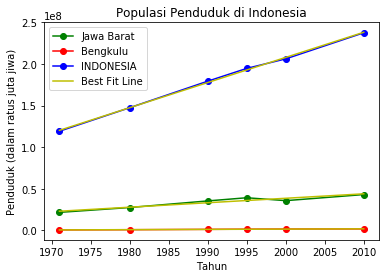

In [380]:
model1 = LinearRegression()
model1.fit(dataplotT[['Tahun']], dataplotT.iloc[0:, 0])
dataplotT['Prov1_Best'] = model1.predict(dataplotT[['Tahun']])
dataplotT
# predict population in 2050
pred1 = model1.predict([[2050]])
pred1 = int(pred1)
print('Prediksi jumlah penduduk di', dataplotT.columns[0], 'tahun 2050 adalah', pred1)


# model 2 --> model for population of province with lowest number of population in 1971
model2 = LinearRegression()
model2.fit(dataplotT[['Tahun']], dataplotT.iloc[0:, 1])
dataplotT['Prov2_Best'] = model2.predict(dataplotT[['Tahun']])

# predict its population in 2050
pred2 = model2.predict([[2050]])
pred2 = int(pred2)
print('Prediksi jumlah penduduk di', dataplotT.columns[1], 'tahun 2050 adalah', pred2)


# model 3 --> model for population of Indonesia
model3 = LinearRegression()
model3.fit(dataplotT[['Tahun']], dataplotT.iloc[0:, 2])
dataplotT['Prov3_Best'] = model3.predict(dataplotT[['Tahun']])

# predict its population in 2050
pred3 = model3.predict([[2050]])
pred3 = int(pred3)
print('Prediksi jumlah penduduk di', dataplotT.columns[2], 'tahun 2050 adalah', pred3)
plt.title('Populasi Penduduk di Indonesia')
plt.plot(
    dataplotT['Tahun'], dataplotT.iloc[0:, 0], 'g-o',
    dataplotT['Tahun'], dataplotT.iloc[0:, 1], 'r-o',
    dataplotT['Tahun'], dataplotT.iloc[0:, 2], 'b-o',
    dataplotT['Tahun'], dataplotT['Prov1_Best'], 'y-',
    dataplotT['Tahun'], dataplotT['Prov2_Best'], 'y-',
    dataplotT['Tahun'], dataplotT['Prov3_Best'], 'y-'
)

plt.grid(False)
plt.xlabel('Tahun')
plt.ylabel('Penduduk (dalam ratus juta jiwa)')
plt.legend([dataplotT.columns[0], dataplotT.columns[1], dataplotT.columns[2], 'Best Fit Line'])
# plt.show()
dataplotT

In [509]:
indiadf = pd.read_csv("final_doc.csv", encoding = "latin-1")
indiadf = indiadf.set_index('State/UT' )
indiadfT = indiadf.T
indiadfT['Year'] = indiadfT.index
col = list(indiadfT.columns)
model = LinearRegression()
for i in range(0,34):
    model.fit(indiadfT[['Year']], indiadfT.iloc[:,i])
    indiadfT['Predicted_{}'.format(col[i])] = model.predict(indiadfT[['Year']])
    pred_2020 = model.predict([[2020.4]])
    pred_2020 = int(pred_2020)
    pred_2050 = model.predict([[2050.4]])
    pred_2050 = int(pred_2050)
    growth = (pred_2050 - pred_2020)/pred_2020
    print("The expected population of {} in 2050 is {} with a change of {:.3f}%.".format(col[i], pred_2050,growth))

The expected population of Andaman and Nicobar Islands in 2050 is 648 with a change of 0.424%.
The expected population of Andhra Pradesh in 2050 is 121320 with a change of 0.304%.
The expected population of Arunachal Pradesh in 2050 is 2003 with a change of 0.380%.
The expected population of Assam in 2050 is 45835 with a change of 0.342%.
The expected population of Bihar in 2050 is 143773 with a change of 0.344%.
The expected population of Chandigarh in 2050 is 1742 with a change of 0.449%.
The expected population of Chhattisgarh in 2050 is 35900 with a change of 0.332%.
The expected population of Delhi in 2050 is 25882 with a change of 0.432%.
The expected population of Goa in 2050 is 2134 with a change of 0.302%.
The expected population of Gujarat in 2050 is 87089 with a change of 0.342%.
The expected population of Haryana in 2050 is 37112 with a change of 0.365%.
The expected population of Himachal Pradesh in 2050 is 9809 with a change of 0.310%.
The expected population of Jammu and

In [504]:
indiadfT.T.head(45)

,1991,1995,2000,2005,2010
State/UT,,,,,
Andhra Pradesh,61.8,62.6,62.3,63.4,66.3
Assam,55.7,57.2,58.2,60.5,62.7
Bihar,59.3,59.6,64.3,64.9,67.8
Chhattisgarh,59.1,58.1,61.3,62.9,63.3
Delhi,65.3,66.5,68.4,70.2,72
Gujarat,61,62.4,63.7,64.4,66.6
Haryana,63.4,64.4,64.6,65.1,66.3
Himachal Pradesh,65,65.2,67.3,67.7,69.3
Jammu and Kashmir,62.1,63.9,65.9,68.9,70.9


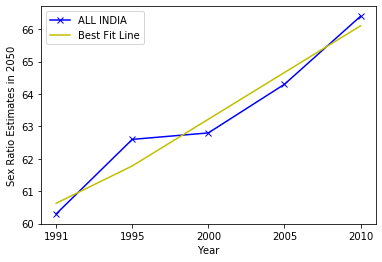

In [507]:

plt.plot(
    indiadfT['Year'], indiadfT.iloc[0:, 21], 'b-x',
    indiadfT['Year'], indiadfT['Predicted_ALL INDIA'], 'y-',
)
plt.grid(False)
plt.xlabel('Year')
plt.ylabel('Sex Ratio Estimates in 2050')
plt.legend([indiadfT.columns[21], 'Best Fit Line'])
plt.show()

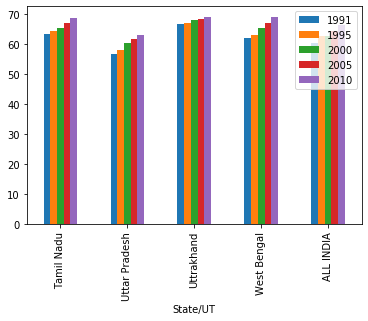

In [493]:
indiadf.iloc[17:,:].plot.bar( rot=90)